Data reading and preprocessing


In [21]:
import pandas as pd
df= pd.read_csv('/content/housing.csv')
df.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


The target column (what we want our model to predict) is usually denoted as y. We will "pop" it out from the rest of the data:

In [22]:
y = df.pop("Expensive")

As you can see, the target is just a bunch of zeros and ones. 1 means the expensive and 0 means they did not expensive:


In [23]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [24]:
X = df
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


2. Basic Exploration
Just look briefly at the data types of your columns get get an idea of how they look like

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [26]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [28]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [29]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

As you can see from the indeces, both the X and y train sets contain first the passenger in position 772, then the one in position 157, etc.

The same applies for the test set:

In [30]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542,NaN,1192,3,2,0,2,220,0
202,7000,50.0,617,2,0,0,1,0,0
213,13568,43.0,990,3,0,0,2,224,0
1331,10780,55.0,911,3,0,0,2,0,0
120,21453,NaN,938,1,2,0,2,0,0


In [31]:
y_test.head()

1253    1
202     0
213     0
1331    0
120     0
Name: Expensive, dtype: int64

In [32]:
len(y_train)

1168

In [33]:
pred_pessimistic_train = pd.Series(0, index=range(1168))

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted . This metric is called accuracy:

In [34]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.85

Okay, we have about a 85% accuracy in our train set. Let's find out how would have it done in our test set:

In [35]:
len(y_test)

292

In [36]:
pred_pessimistic_test = pd.Series(0, index=range(292))

In [37]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.87

The performance is pretty much the same. This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a low variance, which is good. However, a model with a low performance is said to have a high bias, which is not so good.

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is underfitting.

Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

4. Implement a Decision Tree
A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

Import it from the appropriate submodule of Scikit-Learn.
Initialize it.
Fit it.

In [39]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

ValueError: ignored

We got an error: the model cannot deal with categorical features. We will soon learn to encode them as numbers, but our approach should always be to quickly complete the task first, and iterate to improve it later. This is the reason why we will simply start by dropping the categorical features.

5. Select only numerical features

In [40]:
X_num = X.select_dtypes(include="number")

5.1. Train-test split
Since we created a new dataframe without the categorical features, we need to create our test and train sets again.


In [41]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

5.2. Implement a Decision Tree (numerical features)

In [42]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_num_train, y=y_train)

ValueError: ignored

Another error: the model cannot deal with missing data. Let's fix it.



6. Dealing with missing data
We will use the SimpleImputer() with its default values. It will replace any missing value with the mean of the column it belongs to.

In [43]:
# import
from sklearn.impute import SimpleImputer

# initialize
my_imputer = SimpleImputer()

# fit
my_imputer.fit(X_num_train)

# transform train 
X_num_imputed_train = my_imputer.transform(X_num_train)

6.1. Implement a Decision Tree (numerical features + missing values imputed)


In [44]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train, 
            y = y_train)

DecisionTreeClassifier()

6.2. Make predictions and check accuracy on the train set

In [45]:
# make predictions
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [46]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

7. Check accuracy for the test set


Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

7.1. Transform the test set


The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [47]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

7.2. Make predictions on the test set

In [48]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

7.3. Check accuracy score on the test set

In [49]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8767123287671232

This accuracy is even lower than some of our intuition-based models...

Our model has a very high variance: the difference between train and test set is huge. We can also say that our model suffers from overfitting: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

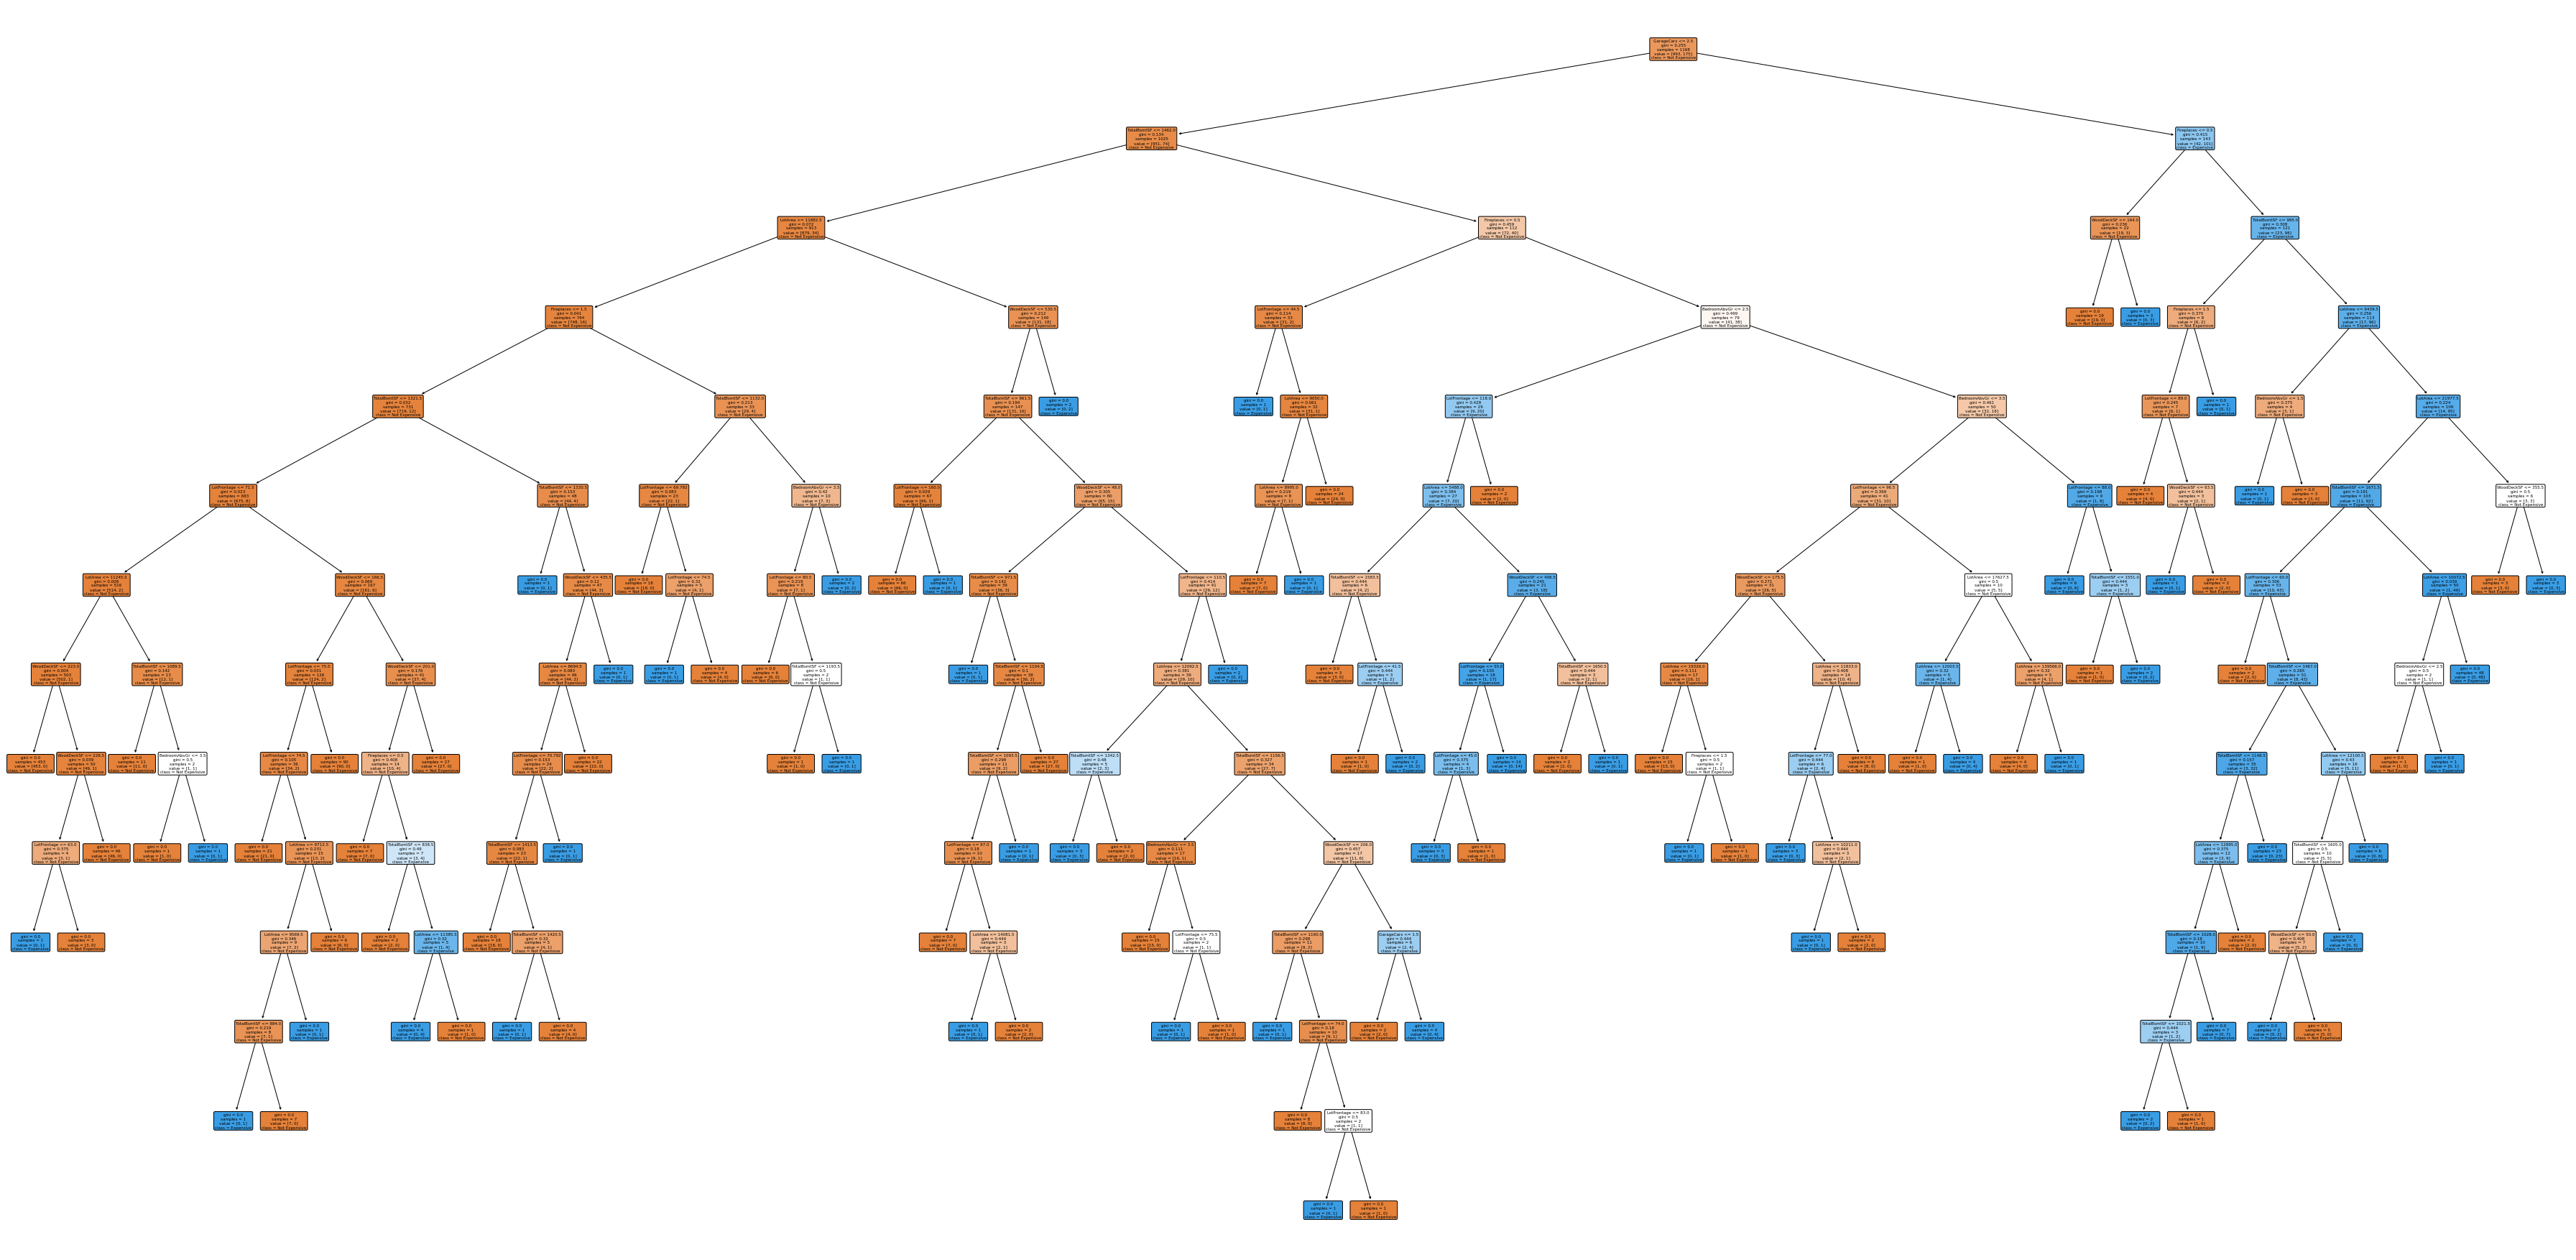

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X_num.columns
     );

Pruning the tree

1.Tweak the parameters max_depth and min_samples_leaf of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
2.Try to make the tree smaller.
3.Visualize again the tree.
4.Check the performance of your "small tree" on the train & test sets.

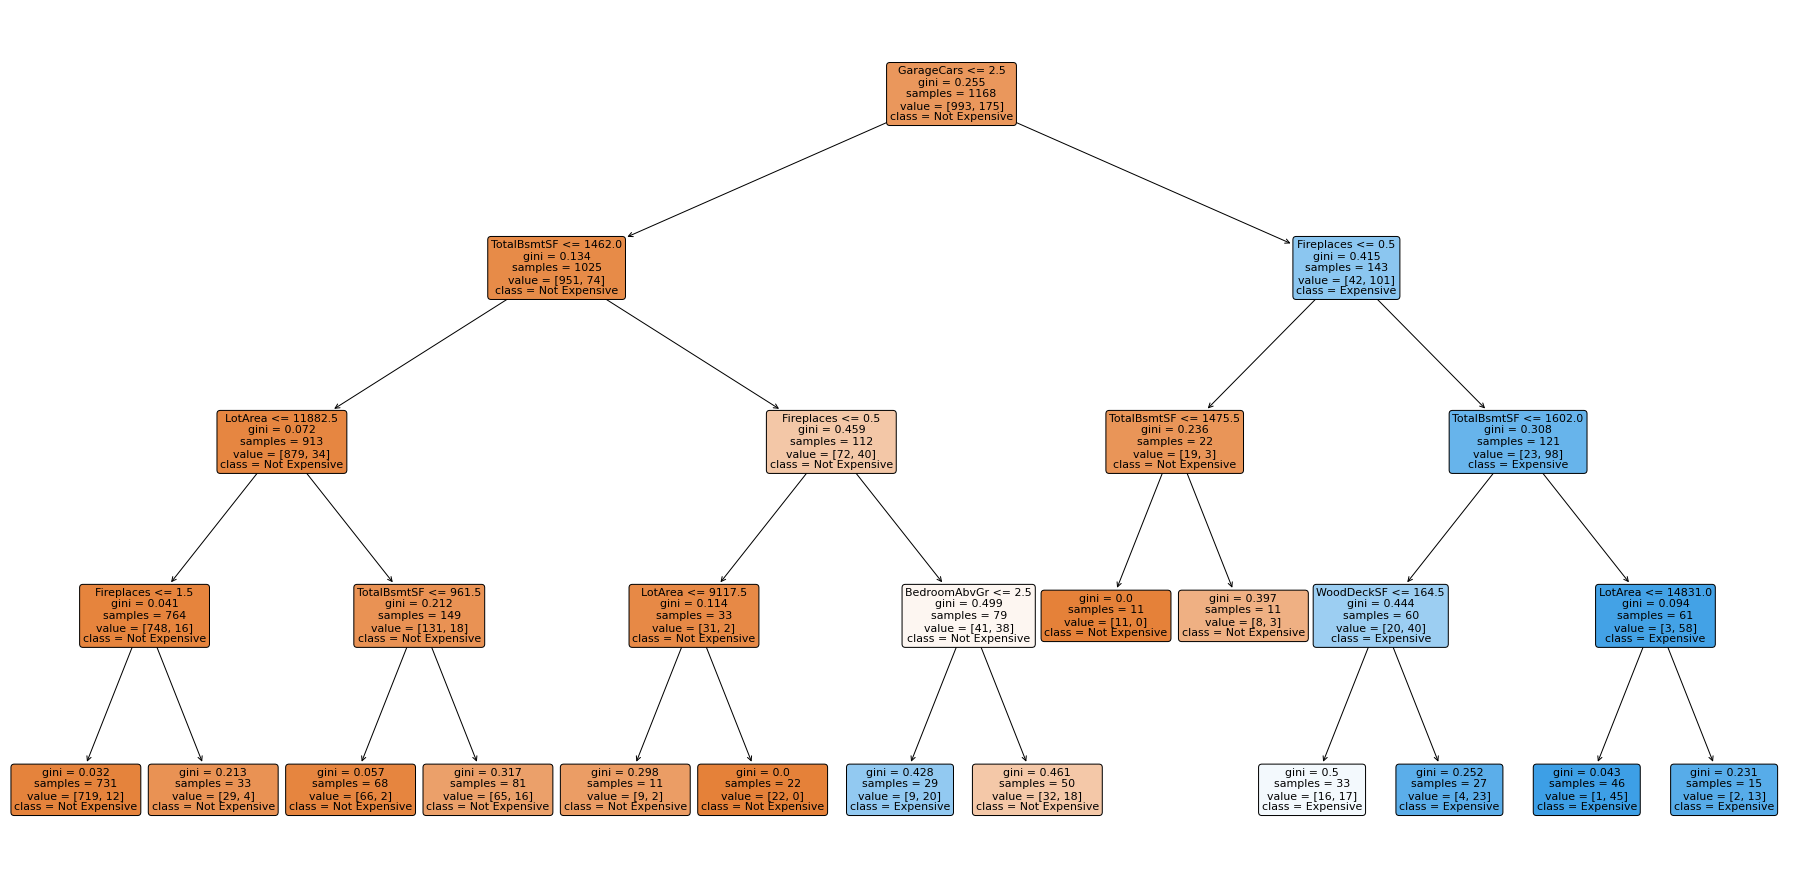

In [51]:
# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                )

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train, 
            y = y_train)

plt.figure(figsize=(32, 16))
plot_tree(
    my_tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Expensive','Expensive'], 
    feature_names=X_num.columns
    );

Check accuracy on the train set

In [52]:
from sklearn.metrics import accuracy_score

y_pred_tree_train = my_tree.predict(X_num_imputed_train)

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train)

0.9238013698630136

 Check accuracy on the test set

In [53]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test)

0.9212328767123288

Creating a Pipeline
Before moving forward in our quest to improve the model, take a moment to learn how to use Scikit-Learn Pipelines. They will not increase your performance, but they are a necessary tool to compress all the steps in the data preparation + modelling phases into a single one, and this will become very relevant as we move forward and keep adding new steps:

Read the lesson "Scikit-Learn Pipelines" on the platform.

Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html



In [54]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# 1. initialize transformers &amp; model
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10)
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)
 
# 3. Fit the pipeline to the training data
pipe.fit(X_num_train, y_train)
 
# 4. Use the pipeline to make predictions
pipe.predict(X_num_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Now, the object pipie can take (almost) raw data as input and output predictions. We no longer need to impute missing values and use the model to make predictions in separate steps.

Using GridsearchCV to find the best parameters

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

It's not efficient in terms of quickly finding the best combination of parameters.
If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!
Grid Search Cross Validation solves both issues:



Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [55]:
# 1. initialize transformers &amp; model
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)

param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
    
from sklearn.model_selection import GridSearchCV
 
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [56]:
search.fit(X_num_imputed_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [57]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 33}

In [58]:
search.best_score_

0.9255236418326547

In [59]:
test=search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [61]:
# Check accuracy on the test set
accuracy_score(y_true = y_test,
               y_pred = test
              )

0.773972602739726

In [ ]:
# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"],
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,